<h1>Linear Regression</h1>

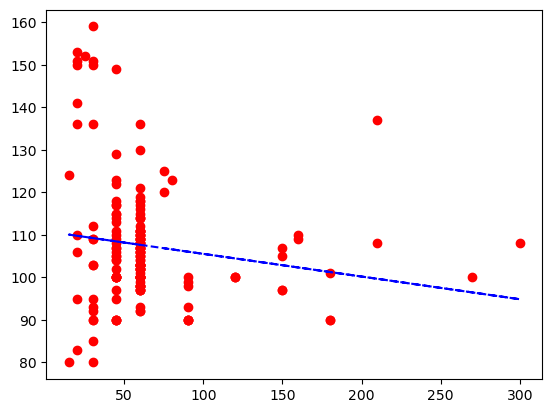

In [29]:
import numpy as np
import pandas as pd
from scipy import stats #regresyon analizi için gerekli kütüphanelerden biri

import matplotlib.pyplot as plt

df=pd.read_csv('data.csv') # veri setini dahil ettik

df1=df['Duration'] # ayırma yapılır
df2=df['Pulse']


slope, intercept, r, p, std_err = stats.linregress(df1, df2) # doğrusal regresyon için gerekli parametreler

def function(df1): # bir fonksiyon ile doğru denklemi geriye döndürülür.
  return slope * df1 + intercept

solution = list(map(function, df1)) #fonksiyon ile dataframe'i eşleştirir.

plt.scatter(df1, df2,marker='o',color='red')
plt.plot(df1, solution,'--',c='b')
plt.show()

In [30]:
r # r değeri korelasyon ifade etmektedir ve 0'a yakın olduğundan zayıf bir ilişki olduğunu göstermektedir.

-0.1554081325805976

In [33]:
p #p değeri ise olasılığı ifade eder.

0.04363433515094764

In [34]:
std_err # regresyon analizindeki standart error değeri

0.02622214666586664

<h1>Polinomsal Regresyon</h1>

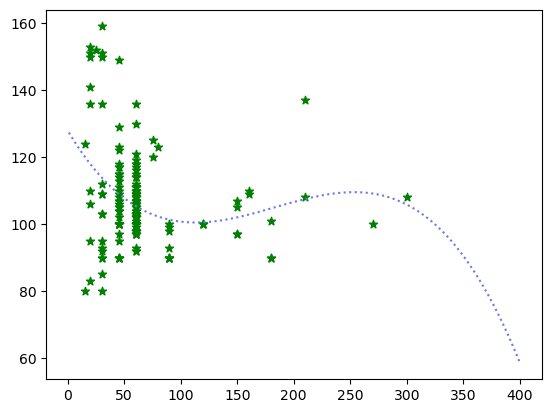

In [56]:
polyd=np.poly1d(np.polyfit(df1,df2,3)) # numpyda polyregresyona ait kütüphaneyi burada çağırdık.3 burada (x^3) fonksiyonu anlamına gelir.
line=np.linspace(1,400,100) # numpydaki bu komutla 1'den 400'e kadar 100'er şekilde böldük.
plt.scatter(df1, df2,marker='*',color='green')
plt.plot(line, polyd(line),':',c='#687AE4')
plt.show()

In [74]:
from sklearn.metrics import r2_score # r^2 (korelasyon karesi) değerini görmemiz için ilgili kütüphaneyi çağırırız.
# import sklearn.metrics
polyd=np.poly1d(np.polyfit(df1,df2,3))
r2_score(df2, polyd(df1)) #ilgili fonksiyon çağrılır ve çıkan sonuca göre oldukça kötü bir ilişki olduğunu görmekteyiz.

# dir(sklearn.metrics) # kütüphanedeki bütün fonksiyonları dir() ile inceleyebiliriz.


0.08959986103067763

In [115]:
from sklearn import linear_model # regresyon analizinde gerekli diğer kütüphane

DF3=df[['Pulse','Maxpulse']]
df4=df['Calories']
lm=linear_model.LinearRegression() # doğrusal regresyonu yapmanın diğer yolu

lm.fit(DF3,df4) #verileri eşleştirir. 
nully_1=pd.isnull(DF3) # boş hücre var mı kontrol ediyoruz. Varsa yerlerini ortalama değerler ile dolduracağız.
nully_2=pd.isnull(df4)
m1=DF3.mean()
m2=df4.mean()
DF3.fillna(m1)
df4.fillna(m2)
pred=lm.predict([[120,130]]) # tahmin yapan fonksiyonu predict() çağırırız.

print(lm.coef_) # birim başına gereken katsayı değerlerini bize gösterir.
pred

[-6.36392724  7.64301911]


C:\Users\Mehmet.Arikan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([265.06251076])